In [107]:
#! pip install pybase64
import pandas as pd
import base64
import numpy as np
from scipy import stats
import itertools as it
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [31]:
## ("~/cloudfiles/code/users/sam.taimourzadeh/shared/hackathon_dataset_post_process.parquet")
df1 = pd.read_csv("~/cloudfiles/code/users/arinjay.jain1/datasets/hackathon_dataset.csv")

In [8]:
## parse function
def parse_signal(signal: str):
    """Parses a Base64-encoded sequence of ADC values into a numpy array."""
    
    raw_adc_values = base64.b64decode(str(signal) + '==')
    
    raw_adc_values = np.array(list(raw_adc_values))
    # The most significant bit of each ADC value is the sign bit. The 7 least significant bits are the value bits.# Convert from raw ADC values to signed integers.
    magnitudes = np.bitwise_and(raw_adc_values,0x7F)
    signs = np.where(raw_adc_values & 0x80 == 0x80, -1, 1)
    signal = magnitudes * signs
    signal = signal.astype(np.float32)
    return signal

In [9]:
df1['decoded_signal'] = df1['Signal'].apply(parse_signal)

In [10]:
df1.to_parquet('~/cloudfiles/code/users/arinjay.jain1/datasets/hackathon_dataset_decoded.parquet')

In [11]:
lengths = df1['decoded_signal'].str.len()
mode = stats.mode(lengths)[0][0]
print(mode)

19184


In [12]:
print(lengths)

0        19100
1        18688
2        17556
3        18952
4        18220
         ...  
27413    18968
27414    18768
27415    19224
27416    19028
27417    18528
Name: decoded_signal, Length: 27418, dtype: int64


In [13]:
## trim(>mode) , replicate(<mode) and nochnage(=mode) 
for decoded_signal_index in range(len(df1['decoded_signal'])):
    #decoded_signal = df1['decoded_signal'][decoded_signal_index]
    size = len(df1['decoded_signal'][decoded_signal_index])
    print(size)
    if size < mode:
        ## replicate
        df1['decoded_signal'][decoded_signal_index] = list(it.islice(it.cycle(df1['decoded_signal'][decoded_signal_index]), mode))
        #df1['same_length_signal'][decoded_signal_index] = np.resize(df1['decoded_signal'][decoded_signal_index], mode-size)
        print("size < mode", len(df1['decoded_signal'][decoded_signal_index]))
    elif size > mode:
        ## trim
        df1['decoded_signal'][decoded_signal_index] = df1['decoded_signal'][decoded_signal_index][:mode]
        print("size > mode",len(df1['decoded_signal'][decoded_signal_index]))
    else:
        df1['decoded_signal'][decoded_signal_index] = df1['decoded_signal'][decoded_signal_index]
        print("size == mode",len(df1['decoded_signal'][decoded_signal_index]))
    #print(len(df1['decoded_signal'][decoded_signal_index]))

19100
size < mode 19184
18688
size < mode 19184
17556
size < mode 19184
18952
size < mode 19184
18220
size < mode 19184
19184
size == mode 19184
19040
size < mode 19184
5094
size < mode 19184
19108
size < mode 19184
19184
size == mode 19184
19224
size > mode 19184
5098
size < mode 19184
19136
size < mode 19184
18732
size < mode 19184
18560
size < mode 19184
19064
size < mode 19184
19088
size < mode 19184
19160
size < mode 19184
5116
size < mode 19184
18272
size < mode 19184
18864
size < mode 19184
19092
size < mode 19184
19100
size < mode 19184
18292
size < mode 19184
19016
size < mode 19184
17988
size < mode 19184
18788
size < mode 19184
18960
size < mode 19184
18984
size < mode 19184
19000
size < mode 19184
18928
size < mode 19184
19152
size < mode 19184
19132
size < mode 19184
19204
size > mode 19184
19136
size < mode 19184
18104
size < mode 19184
19240
size > mode 19184
18944
size < mode 19184
19136
size < mode 19184
11516
size < mode 19184
19068
size < mode 19184
18808
size < mode

In [19]:
df1.Label.value_counts()

0    18388
1     9030
Name: Label, dtype: int64

In [15]:
df1.head(5)

,Episode,Label,Signal,decoded_signal
0,DeviceOSEBCMPDZAZ7__EpisodeHFDMGC46COM2,0,Rrjh7bcdOyUQDA8OCAYICAYHCAYGBgUFBAMEBAICBwUAAA...,"[70.0, -56.0, -97.0, -109.0, -55.0, 29.0, 59.0..."
1,Device/KDFTQ4HUMRD__EpisodeW5+1+HZDWVQE,1,CAkJBwcGDQ4KCAcEAgADAgQbWWkwu//4uYiBhIQAAAACAg...,"[8.0, 9.0, 9.0, 7.0, 7.0, 6.0, 13.0, 14.0, 10...."
2,DeviceDLFOL6DT/WOV__EpisodeUYPCWAWAZYGZ,0,hIKBAAEDAwEAAgMBAAEEBQQBAQIAh5SakAUXFg4ICQkIBQ...,"[-4.0, -2.0, -1.0, 0.0, 1.0, 3.0, 3.0, 1.0, 0...."
3,DeviceQEMR3QU3IMXF__EpisodeXF8CO+KDN0TN,0,BgcIBwUGBgYGBAMBgYKCgQEECQsJBwWEmaOZAi1TVDcaCw...,"[6.0, 7.0, 8.0, 7.0, 5.0, 6.0, 6.0, 6.0, 6.0, ..."
4,DeviceXLBY/IIVTCUE__EpisodeUOW1CTCRGD5M,0,hISDhISEhIODhYWEhIOEhYWEg4ODg4SCAACDhISEhoeGhI...,"[-4.0, -4.0, -3.0, -4.0, -4.0, -4.0, -4.0, -3...."


In [16]:
df1[['Episode', 'Label','decoded_signal']].to_parquet('~/cloudfiles/code/users/arinjay.jain1/datasets/hackathon_dataset_decoded_mode.parquet')

## ====== Start fof ML Model =========

In [2]:
df5 = pd.read_parquet('~/cloudfiles/code/users/arinjay.jain1/datasets/hackathon_dataset_decoded_mode.parquet')

In [3]:
df5.head(5)

,Episode,Label,decoded_signal
0,DeviceOSEBCMPDZAZ7__EpisodeHFDMGC46COM2,0,"[70.0, -56.0, -97.0, -109.0, -55.0, 29.0, 59.0..."
1,Device/KDFTQ4HUMRD__EpisodeW5+1+HZDWVQE,1,"[8.0, 9.0, 9.0, 7.0, 7.0, 6.0, 13.0, 14.0, 10...."
2,DeviceDLFOL6DT/WOV__EpisodeUYPCWAWAZYGZ,0,"[-4.0, -2.0, -1.0, 0.0, 1.0, 3.0, 3.0, 1.0, 0...."
3,DeviceQEMR3QU3IMXF__EpisodeXF8CO+KDN0TN,0,"[6.0, 7.0, 8.0, 7.0, 5.0, 6.0, 6.0, 6.0, 6.0, ..."
4,DeviceXLBY/IIVTCUE__EpisodeUOW1CTCRGD5M,0,"[-4.0, -4.0, -3.0, -4.0, -4.0, -4.0, -4.0, -3...."


## Data Augmentation

In [4]:
newarr_part1 = []
newarr_part2 = []
new_label = []
for j in range(0,df5.shape[0]):
    newarr_part1.append(np.array_split(df5['decoded_signal'][j], 2)[0])
    newarr_part2.append(np.array_split(df5['decoded_signal'][j], 2)[1])

In [5]:
df = pd.DataFrame(list(zip(newarr_part1, newarr_part2, df5['Label'], df5['decoded_signal'])),
               columns =['decoded_part1','decoded_part2', 'Label', 'decoded_signal'])
df

,decoded_part1,decoded_part2,Label,decoded_signal
0,"[70.0, -56.0, -97.0, -109.0, -55.0, 29.0, 59.0...","[4.0, 4.0, 1.0, 1.0, 1.0, 0.0, -2.0, -1.0, 0.0...",0,"[70.0, -56.0, -97.0, -109.0, -55.0, 29.0, 59.0..."
1,"[8.0, 9.0, 9.0, 7.0, 7.0, 6.0, 13.0, 14.0, 10....","[-4.0, -8.0, -11.0, -8.0, -5.0, -9.0, -12.0, -...",1,"[8.0, 9.0, 9.0, 7.0, 7.0, 6.0, 13.0, 14.0, 10...."
2,"[-4.0, -2.0, -1.0, 0.0, 1.0, 3.0, 3.0, 1.0, 0....","[8.0, 8.0, 8.0, 9.0, 10.0, 9.0, 9.0, 9.0, 8.0,...",0,"[-4.0, -2.0, -1.0, 0.0, 1.0, 3.0, 3.0, 1.0, 0...."
3,"[6.0, 7.0, 8.0, 7.0, 5.0, 6.0, 6.0, 6.0, 6.0, ...","[2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, ...",0,"[6.0, 7.0, 8.0, 7.0, 5.0, 6.0, 6.0, 6.0, 6.0, ..."
4,"[-4.0, -4.0, -3.0, -4.0, -4.0, -4.0, -4.0, -3....","[-3.0, -3.0, -4.0, 1.0, 32.0, 74.0, 75.0, -2.0...",0,"[-4.0, -4.0, -3.0, -4.0, -4.0, -4.0, -4.0, -3...."
...,...,...,...,...
27413,"[7.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 5.0, 5.0, ...","[8.0, 7.0, 7.0, 8.0, 7.0, 7.0, 6.0, 6.0, 6.0, ...",1,"[7.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 5.0, 5.0, ..."
27414,"[-1.0, -3.0, -5.0, -6.0, -6.0, -6.0, -6.0, -6....","[2.0, 2.0, 2.0, 2.0, 5.0, 6.0, -2.0, -25.0, -5...",0,"[-1.0, -3.0, -5.0, -6.0, -6.0, -6.0, -6.0, -6...."
27415,"[-1.0, -2.0, -1.0, -1.0, 0.0, 1.0, 1.0, 5.0, 1...","[1.0, 1.0, 2.0, 3.0, 6.0, 7.0, 9.0, 16.0, 20.0...",1,"[-1.0, -2.0, -1.0, -1.0, 0.0, 1.0, 1.0, 5.0, 1..."
27416,"[-51.0, -77.0, -32.0, 15.0, 13.0, 2.0, 4.0, 8....","[3.0, 2.0, 0.0, 3.0, 4.0, 2.0, 0.0, -2.0, -4.0...",0,"[-51.0, -77.0, -32.0, 15.0, 13.0, 2.0, 4.0, 8...."


In [6]:
df1 = pd.DataFrame(df[['decoded_part1', 'Label']])

df1 = df1.rename(columns={"decoded_part1": "subSignal", "Label": "Label"})

df2 = pd.DataFrame(df[['decoded_part2', 'Label']])
df2 = df2.rename(columns={"decoded_part2": "subSignal", "Label": "Label"})

df_final = pd.concat([df1, df2])

In [7]:
df_final

,subSignal,Label
0,"[70.0, -56.0, -97.0, -109.0, -55.0, 29.0, 59.0...",0
1,"[8.0, 9.0, 9.0, 7.0, 7.0, 6.0, 13.0, 14.0, 10....",1
2,"[-4.0, -2.0, -1.0, 0.0, 1.0, 3.0, 3.0, 1.0, 0....",0
3,"[6.0, 7.0, 8.0, 7.0, 5.0, 6.0, 6.0, 6.0, 6.0, ...",0
4,"[-4.0, -4.0, -3.0, -4.0, -4.0, -4.0, -4.0, -3....",0
...,...,...
27413,"[8.0, 7.0, 7.0, 8.0, 7.0, 7.0, 6.0, 6.0, 6.0, ...",1
27414,"[2.0, 2.0, 2.0, 2.0, 5.0, 6.0, -2.0, -25.0, -5...",0
27415,"[1.0, 1.0, 2.0, 3.0, 6.0, 7.0, 9.0, 16.0, 20.0...",1
27416,"[3.0, 2.0, 0.0, 3.0, 4.0, 2.0, 0.0, -2.0, -4.0...",0


### FFT

In [8]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

In [9]:
df_final['fftnoise_signal'] = df_final['subSignal'].apply(fftnoise)

In [10]:
#CNN
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

#splitting dataset to dependent and independent variable
X = df_final['fftnoise_signal'].values #independent values / features
y = df_final['Label'].values #dependent values / target

#splitting the datasets for training and testing process
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

X_train = np.vstack(X_train).astype(np.float)
y_train = np.vstack(y_train).astype(np.int)
X_test = np.vstack(X_test).astype(np.float)
y_test = np.vstack(y_test).astype(np.int)


#size for the sets
print('size of X_train:', X_train.shape)
print('size of X_test:', X_test.shape)
print('size of y_train:', y_train.shape)
print('size of y_test:', y_test.shape)



#Reshape train and test data to (n_samples, 19184, 1), where each sample is of size (19184, 1)
X_train = np.array(X_train).reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

<ipython-input-10-19a3e82ccf70>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = np.vstack(X_train).astype(np.float)
<ipython-input-10-19a3e82ccf70>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np

size of X_train: (43868, 9592)
size of X_test: (10968, 9592)
size of y_train: (43868, 1)
size of y_test: (10968, 1)
X Train shape:  (43868, 9592, 1)
X Test shape:  (10968, 9592, 1)


## Modeling 

In [11]:
y_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [12]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization

In [27]:
# Create sequential model 
import tensorflow as tf
cnn_model_fft = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model_fft.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (9592,1)))

#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model_fft.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))

#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model_fft.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))
cnn_model_fft.add(Dropout(0.5))
cnn_model_fft.add(BatchNormalization())

#Fourth CNN layer with Max pooling
cnn_model_fft.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model_fft.add(Dropout(0.5))
cnn_model_fft.add(BatchNormalization())

#Flatten the output
cnn_model_fft.add(Flatten())

#Add a dense layer with 256 neurons
cnn_model_fft.add(Dense(units = 256, activation='relu'))

#Add a dense layer with 512 neurons  512 to 256 
cnn_model_fft.add(Dense(units = 512, activation='relu'))

#sigmoid as last layer with 1 outputs
cnn_model_fft.add(Dense(units = 1, activation='sigmoid'))

In [28]:
cnn_model_fft.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [29]:
cnn_model_fft.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 9592, 32)          128       
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 9592, 64)          6208      
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 9592, 128)         24704     
_________________________________________________________________
dropout_11 (Dropout)         (None, 9592, 128)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 9592, 128)         512       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 4796, 128)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 4796, 128)        

In [30]:

cnn_model_history = cnn_model_fft.fit(X_train, y_train, epochs=30, batch_size = 512, validation_data = (X_test, y_test))

Epoch 1/30
86/86 [==============================] - 564s 7s/step - loss: 4.8857 - accuracy: 0.5947 - val_loss: 3.5301 - val_accuracy: 0.3293
Epoch 2/30
86/86 [==============================] - 563s 7s/step - loss: 0.5875 - accuracy: 0.7000 - val_loss: 2.1759 - val_accuracy: 0.6707
Epoch 3/30
86/86 [==============================] - 564s 7s/step - loss: 0.4669 - accuracy: 0.7782 - val_loss: 3.6070 - val_accuracy: 0.6707
Epoch 4/30
86/86 [==============================] - 563s 7s/step - loss: 0.3526 - accuracy: 0.8470 - val_loss: 3.1892 - val_accuracy: 0.3293
Epoch 5/30
86/86 [==============================] - 563s 7s/step - loss: 0.2520 - accuracy: 0.8984 - val_loss: 1.3456 - val_accuracy: 0.3293
Epoch 6/30
86/86 [==============================] - 565s 7s/step - loss: 0.1866 - accuracy: 0.9271

Text(0, 0.5, 'Accuracy')

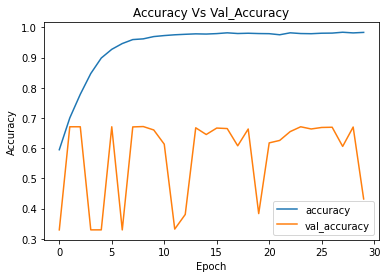

In [31]:
import matplotlib.pyplot as plt
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

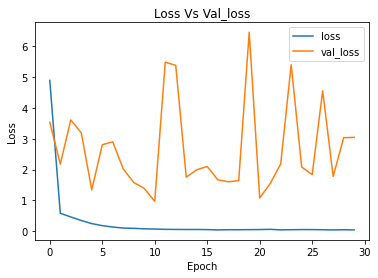

In [32]:
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [33]:
cnn_model_fft.save('cnn_fft_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cnn_fft_model/assets


In [37]:
import onnxruntime as nxrun

In [38]:
model = nxrun.InferenceSession('fft_model.onnx')

In [85]:
signal = np.vstack(df_final['fftnoise_signal'][0]).astype(np.float)
signal = np.array(signal).reshape(1, signal.shape[0], 1)
    


<ipython-input-85-09d93ae2ce1f>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  signal = np.vstack(df_final['fftnoise_signal'][0]).astype(np.float)


In [86]:
signal

array([[[-0.20382055],
        [-0.023517  ],
        [-0.02935108],
        ...,
        [-0.03956265],
        [-0.01282209],
        [-0.36132911]]])

In [77]:
np.array(df_final['fftnoise_signal'][0])

array([-0.20382055, -0.023517  , -0.02935108, ..., -0.03956265,
       -0.01282209, -0.36132911])

In [88]:
model.run(None, {signal: signal})

TypeError: unhashable type: 'numpy.ndarray'

In [83]:
model_fft = tf.keras.models.load_model('cnn_fft_model')

In [87]:
model_fft.predict(signal)

array([[3.2647665e-06]], dtype=float32)

In [89]:
def autocorr(x):
    n = x.size
    norm = (x - np.mean(x))
    result = np.correlate(norm, norm, mode='full')
    buff = 10
    acorr = result[(n+buff):] / (x.var() * np.arange(n-buff, 1, -1))
    m = acorr.size
    acorr_half = acorr[:(m//2)]
    #lag = np.abs(acorr_half).argmax()
    lag = acorr_half.argmax() #looking for positive correlation only!
    r = acorr_half[lag]        
#     if np.abs(r) > 0.5:
#       print('Appears to be autocorrelated with r = {}, lag = {}'. format(r, lag))
#     else: 
#       print('Appears to be not autocorrelated')
    return acorr_half, r, lag

def corr(string):
    # ecg_signal = parse_signal(string)
    ecg_signal = string
    step = 5000 #step size 2500
    r_final = 1
    x_final = []
    temp_final = 0
    
    # padding zeros - if length of signal less than step 
    if len(ecg_signal) < 5000:
        ecg_signal = np.pad(ecg_signal, (0, 5000-len(ecg_signal)), 'constant')
    
    for temp in range(0,len(ecg_signal),step):
        x = ecg_signal[temp:(temp+step)]
        if len(x) < step:
            break
        x_acorr, r, lag = autocorr(x)
        
        # find the min 'r'
        if r < r_final:
            r_final = r
            x_final = ecg_signal[temp:(temp+step)]

    x_final = np.asarray(x_final).astype(np.float32)
    return x_final


In [93]:
df_final['subSignal'][0].shape

(9592,)

In [94]:
corr(df_final['subSignal'][0]).shape

(5000,)

In [49]:
df_final = df_final.reset_index(drop=True)

In [132]:
df_final


,subSignal,Label,fftnoise_signal
0,"[70.0, -56.0, -97.0, -109.0, -55.0, 29.0, 59.0...",0,"[-0.20382055454307274, -0.023516997436368012, ..."
1,"[8.0, 9.0, 9.0, 7.0, 7.0, 6.0, 13.0, 14.0, 10....",1,"[0.14460559167128204, 0.15881912493383377, 0.2..."
2,"[-4.0, -2.0, -1.0, 0.0, 1.0, 3.0, 3.0, 1.0, 0....",0,"[-0.005521862152421023, 0.19169847838787687, -..."
3,"[6.0, 7.0, 8.0, 7.0, 5.0, 6.0, 6.0, 6.0, 6.0, ...",0,"[0.13484983789464333, 0.09776980257012521, -0...."
4,"[-4.0, -4.0, -3.0, -4.0, -4.0, -4.0, -4.0, -3....",0,"[-0.2454446609155767, 0.2022371607438889, -0.1..."
...,...,...,...
54831,"[8.0, 7.0, 7.0, 8.0, 7.0, 7.0, 6.0, 6.0, 6.0, ...",1,"[0.0213183877951362, -0.2347880937185423, 0.04..."
54832,"[2.0, 2.0, 2.0, 2.0, 5.0, 6.0, -2.0, -25.0, -5...",0,"[-0.09196194808159325, -0.08706754793410872, -..."
54833,"[1.0, 1.0, 2.0, 3.0, 6.0, 7.0, 9.0, 16.0, 20.0...",1,"[-0.05541400154733287, 0.04200783626761092, -0..."
54834,"[3.0, 2.0, 0.0, 3.0, 4.0, 2.0, 0.0, -2.0, -4.0...",0,"[0.17836050043105803, 0.14460908226113647, 0.0..."


In [134]:
df_final[['subSignal','Label']].to_parquet('~/cloudfiles/code/users/arinjay.jain1/datasets/hackathon_dataset_sub.parquet')

### Size doe 1 min signal (1 x 60 x128): 7680

In [135]:
## trim(> 7680)

N = 7680

for signal_index in range(len(df_final['subSignal'])):
    #decoded_signal = df1['decoded_signal'][decoded_signal_index]
    size = len(df_final['subSignal'][signal_index])
    print(size)
    if size > N:
        ## trim
        df_final['subSignal'][signal_index] = df_final['subSignal'][signal_index][:N]
        print("size > 7680",len(df_final['subSignal'][signal_index]))

7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680
7680


In [138]:
#CNN
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

#splitting dataset to dependent and independent variable
X = df_final['subSignal'].values #independent values / features
y = df_final['Label'].values #dependent values / target

#splitting the datasets for training and testing process
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

X_train = np.vstack(X_train).astype(np.float)
y_train = np.vstack(y_train).astype(np.int)
X_test = np.vstack(X_test).astype(np.float)
y_test = np.vstack(y_test).astype(np.int)


#size for the sets
print('size of X_train:', X_train.shape)
print('size of X_test:', X_test.shape)
print('size of y_train:', y_train.shape)
print('size of y_test:', y_test.shape)



#Reshape train and test data to (n_samples, 19184, 1), where each sample is of size (19184, 1)
X_train = np.array(X_train).reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

<ipython-input-138-1cd368561d97>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = np.vstack(X_train).astype(np.float)
<ipython-input-138-1cd368561d97>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = 

In [139]:
X_test.shape

(10968, 7680, 1)

In [148]:
# Create sequential model 
import tensorflow as tf
model = tf.keras.models.Sequential()

model.add(Conv1D(filters=32, kernel_size=(3,), strides=3, activation='relu', padding='same', input_shape=(7680, 1)))
model.add(BatchNormalization())

#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv1D(64, kernel_size=(3,), strides=2, activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(Conv1D(128, kernel_size=(3,), strides=2, activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv1D(256, kernel_size=(3,), strides=2, activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv1D(filters=128, kernel_size=(3,), strides=2, activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv1D(filters=64, kernel_size=(3,), strides=2, activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv1D(filters=32, kernel_size=(3,), strides=2, activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

opt = Adam(lr=0.001)#Adam(lr=0.001)
model.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.75,
                              patience=5, min_lr=0.000001)


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_100 (Conv1D)          (None, 2560, 32)          128       
_________________________________________________________________
batch_normalization_90 (Batc (None, 2560, 32)          128       
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 1280, 64)          6208      
_________________________________________________________________
batch_normalization_91 (Batc (None, 1280, 64)          256       
_________________________________________________________________
conv1d_102 (Conv1D)          (None, 640, 128)          24704     
_________________________________________________________________
dropout_64 (Dropout)         (None, 640, 128)          0         
_________________________________________________________________
batch_normalization_92 (Batc (None, 640, 128)        

In [149]:
model_history = model.fit(X_train, y_train,  epochs=20, batch_size=128, validation_data = (X_test, y_test), callbacks=[reduce_lr])

Epoch 1/20
343/343 [==============================] - 95s 278ms/step - loss: 3.9262e-08 - accuracy: 0.5427 - val_loss: 3.9258e-08 - val_accuracy: 0.6658 - lr: 0.0010
Epoch 2/20
343/343 [==============================] - 95s 277ms/step - loss: 3.9262e-08 - accuracy: 0.5402 - val_loss: 3.9258e-08 - val_accuracy: 0.6652 - lr: 0.0010
Epoch 3/20
343/343 [==============================] - 95s 277ms/step - loss: 3.9262e-08 - accuracy: 0.5439 - val_loss: 3.9258e-08 - val_accuracy: 0.6655 - lr: 0.0010
Epoch 4/20
343/343 [==============================] - 96s 279ms/step - loss: 3.9262e-08 - accuracy: 0.5423 - val_loss: 3.9258e-08 - val_accuracy: 0.6655 - lr: 0.0010
Epoch 5/20
343/343 [==============================] - 95s 277ms/step - loss: 3.9262e-08 - accuracy: 0.5382 - val_loss: 3.9258e-08 - val_accuracy: 0.6654 - lr: 0.0010
Epoch 6/20
343/343 [====================

In [150]:
model.save('model_cnn_7680_4')

INFO:tensorflow:Assets written to: model_cnn_7680_4/assets


In [122]:
model_7680 = tf.keras.models.load_model('model_cnn_7680')

In [128]:
test = X_test[0].reshape(1, 7680,1)

In [131]:
if model_7680.predict(test)>0.5:
    print(1)

1


In [14]:
from tensorflow.keras import backend as K

def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [15]:
cnn_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy', recall, precision, get_f1])

In [16]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 19184, 32)         128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 19184, 64)         6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19184, 128)        24704     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 19184, 256)        98560     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 9592, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 9592, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2455552)           0

In [64]:
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=20, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/20
2552/2552 [==============================] - 9352s 4s/step - loss: 0.6789 - accuracy: 0.5841 - recall: 0.5985 - precision: 0.5534 - get_f1: 0.5386 - val_loss: 0.6656 - val_accuracy: 0.6031 - val_recall: 0.6917 - val_precision: 0.5849 - val_get_f1: 0.6115
Epoch 2/20
2552/2552 [==============================] - 6383s 3s/step - loss: 0.6128 - accuracy: 0.6696 - recall: 0.5924 - precision: 0.6965 - get_f1: 0.6050 - val_loss: 0.6426 - val_accuracy: 0.6323 - val_recall: 0.5585 - val_precision: 0.6505 - val_get_f1: 0.5732
Epoch 3/20
 419/2552 [===>..........................] - ETA: 1:29:52 - loss: 0.4207 - accuracy: 0.8017 - recall: 0.7031 - precision: 0.8757 - get_f1: 0.7560

In [44]:
def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

In [ ]:
band_limited_noise(df5['decoded_signal'][0])

In [8]:
from tensorflow import keras

model = keras.models.load_model('CNN_model_v2.h5')

AttributeError: 'str' object has no attribute 'decode'

In [12]:
#Users/arinjay.jain1/code/CNN_model_v2.h5
model_cnn_v = keras.models.load_model('CNN_model_v2.h5', compile=False)
#sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model_cnn_v.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


AttributeError: 'str' object has no attribute 'decode'

In [ ]:
!pip3 install --upgrade pip3
!pip3 install tensorflow
!pip3 install keras